In [82]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [83]:
df  = pd.read_csv('../data_files/Employment_by_County.csv', index_col=0)
df.head(5)

,county,labor_force,employed,unemployed,unemployed_pct,population,race_white,race_black,race_native,race_asian,race_islander,race_other,race_two_or_more
geoid,,,,,,,,,,,,,
1001,"Autauga County, Alabama",25838,24576,1262,4.9,58805,42160,11445,217,881,35,910,3157
1003,"Baldwin County, Alabama",96763,91338,5425,5.6,231767,189399,18217,1582,2067,143,5335,15024
1005,"Barbour County, Alabama",8587,7982,605,7.0,25223,11317,11933,116,117,1,1039,700
1007,"Bibb County, Alabama",8640,8067,573,6.6,22293,16555,4413,60,32,9,465,759
1009,"Blount County, Alabama",24661,23653,1008,4.1,59134,50663,845,337,178,24,3431,3656


In [84]:
# split column into multiple columns by delimiter 
df[['county', 'state']] = df['county'].str.split(',', expand=True)
df

,county,labor_force,employed,unemployed,unemployed_pct,population,race_white,race_black,race_native,race_asian,race_islander,race_other,race_two_or_more,state
geoid,,,,,,,,,,,,,,
1001,Autauga County,25838,24576,1262,4.9,58805,42160,11445,217,881,35,910,3157,Alabama
1003,Baldwin County,96763,91338,5425,5.6,231767,189399,18217,1582,2067,143,5335,15024,Alabama
1005,Barbour County,8587,7982,605,7.0,25223,11317,11933,116,117,1,1039,700,Alabama
1007,Bibb County,8640,8067,573,6.6,22293,16555,4413,60,32,9,465,759,Alabama
1009,Blount County,24661,23653,1008,4.1,59134,50663,845,337,178,24,3431,3656,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,Sweetwater County,20840,19308,1532,7.4,42272,34389,366,433,295,70,2508,4211,Wyoming
56039,Teton County,15204,14292,912,6.0,23331,19202,55,185,317,5,1415,2152,Wyoming
56041,Uinta County,9312,8730,582,6.3,20450,18007,66,191,114,27,864,1181,Wyoming


In [85]:
df = df.sort_values(by='employed', ascending=False)

In [86]:
df_grouped = df.groupby(['county'], as_index=False).agg(
    state = ('state', lambda x: x.iloc[0]),
    total_unemployed = ('unemployed', 'sum')
    )

In [87]:
df_grouped

,county,state,total_unemployed
0,Abbeville County,South Carolina,670
1,Acadia Parish,Louisiana,1705
2,Accomack County,Virginia,1041
3,Ada County,Idaho,13893
4,Adair County,Missouri,1669
...,...,...,...
1855,Yukon-Koyukuk Census Area,Alaska,280
1856,Yuma County,Arizona,16969
1857,Zapata County,Texas,571
1858,Zavala County,Texas,484


In [88]:
df.sort_values(by='unemployed', ascending=False)

,county,labor_force,employed,unemployed,unemployed_pct,population,race_white,race_black,race_native,race_asian,race_islander,race_other,race_two_or_more,state
geoid,,,,,,,,,,,,,,
6037,Los Angeles County,4921499,4291688,629811,12.8,10014009,3259427,794364,163464,1499984,24522,2784180,1488068,California
17031,Cook County,2539907,2258453,281454,11.1,5275541,2345983,1205824,56894,413271,1864,705153,546552,Illinois
48201,Harris County,2292759,2088449,204310,8.9,4731145,1720356,907063,55011,349268,4141,895151,800155,Texas
4013,Maricopa County,2331628,2159267,172361,7.4,4420568,2645512,260469,100645,203696,10966,598605,600675,Arizona
32003,Clark County,1123582,958069,165513,14.7,2265461,1016368,286684,23735,237663,20572,348344,332095,Nevada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30069,Petroleum County,264,255,9,3.4,496,466,0,0,1,0,0,29,Montana
31009,Blaine County,255,246,9,3.5,431,397,1,0,3,0,6,24,Nebraska
31075,Grant County,409,401,8,2.0,611,580,5,12,1,0,1,12,Nebraska


In [89]:
df[0:5]

,county,labor_force,employed,unemployed,unemployed_pct,population,race_white,race_black,race_native,race_asian,race_islander,race_other,race_two_or_more,state
geoid,,,,,,,,,,,,,,
6037,Los Angeles County,4921499,4291688,629811,12.8,10014009,3259427,794364,163464,1499984,24522,2784180,1488068,California
17031,Cook County,2539907,2258453,281454,11.1,5275541,2345983,1205824,56894,413271,1864,705153,546552,Illinois
4013,Maricopa County,2331628,2159267,172361,7.4,4420568,2645512,260469,100645,203696,10966,598605,600675,Arizona
48201,Harris County,2292759,2088449,204310,8.9,4731145,1720356,907063,55011,349268,4141,895151,800155,Texas
6059,Orange County,1553301,1416738,136563,8.8,3186989,1383257,53842,38322,706813,9035,548539,447181,California


In [90]:
df['race_white'][0:5]

geoid
6037     3259427
17031    2345983
4013     2645512
48201    1720356
6059     1383257
Name: race_white, dtype: int64

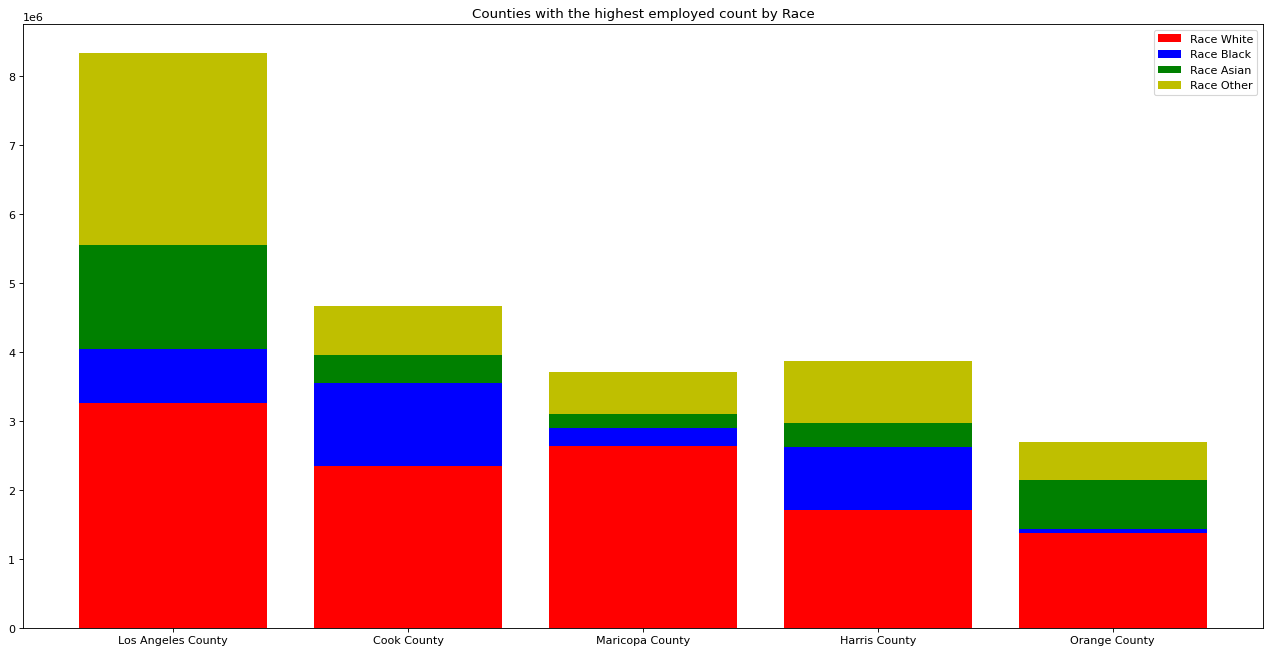

In [91]:
x = ['Los Angeles County', 'Cook County', 'Maricopa County', 'Harris County', 'Orange County']
y1 = df[0:5]['race_white']
y2 = df[0:5]['race_black']
y3 = df[0:5]['race_asian']
y4 = df[0:5]['race_other']
width = 0.35       # the width of the bars: can also be len(x) sequence
figure(figsize = (20, 10), dpi = 80)
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='g')
plt.bar(x, y4, bottom=y1+y2+y3, color='y')
plt.legend(['Race White', 'Race Black', 'Race Asian', 'Race Other'])
plt.title("Counties with the highest employed count by Race")

plt.show()

ValueError: not enough values to unpack (expected 4, got 1)

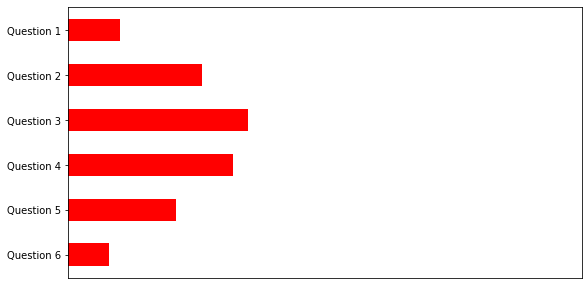

In [106]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = ['r', 'b', 'r', 'b', 'g']

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()